<a href="https://colab.research.google.com/github/SeaLeeDawng1one/CT-Phoi/blob/main/TNCT_PHOI_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive
Before transpose: (613, 3, 224, 224)
After transpose:  (613, 224, 224, 3)
y_train unique labels: [0 1 2 3]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 70, 70, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 23, 23, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,386,372 (16.73 MB)

 Trainable params: 4,386,372 (16.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.4809 - loss: 1.3736 - val_accuracy: 0.4677 - val_loss: 1.3205
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.5673 - loss: 1.2670 - val_accuracy: 0.4677 - val_loss: 1.2046
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.5554 - loss: 1.1150 - val_accuracy: 0.4516 - val_loss: 1.1515
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5417 - loss: 1.0493 - val_accuracy: 0.4677 - val_loss: 1.1120
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.5640 - loss: 0.9804 - val_accuracy: 0.4355 - val_loss: 1.0630
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.5721 - loss: 0.9519 - val_accuracy: 0.5000 - val_loss: 1.0084
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.5881 - loss: 0.9598 - val_accuracy: 0.5000 - val_loss: 0.9577
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.5675 - loss: 0.9204 - val_accuracy: 0.5161 - val_loss:

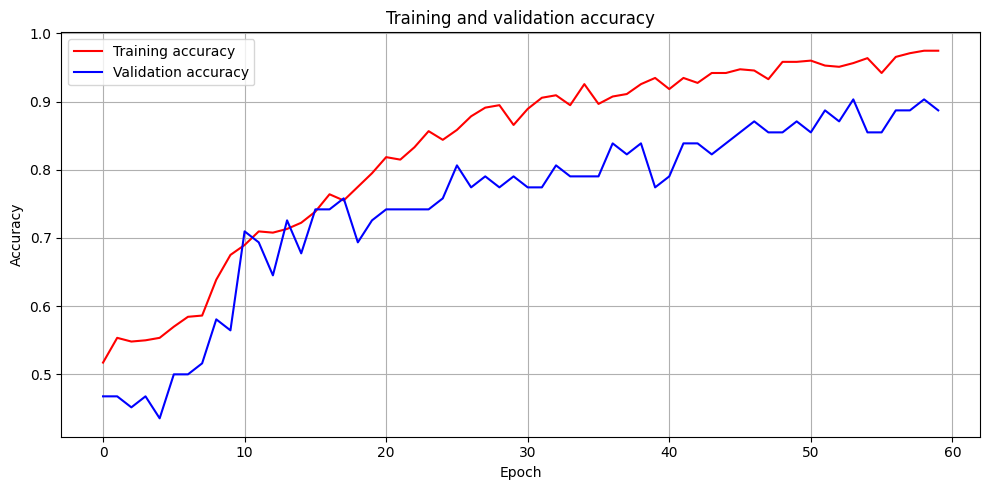

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 405ms/step - accuracy: 0.7795 - loss: 1.0846
Test loss: 0.9292
Test accuracy: 0.7778
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 768ms/step


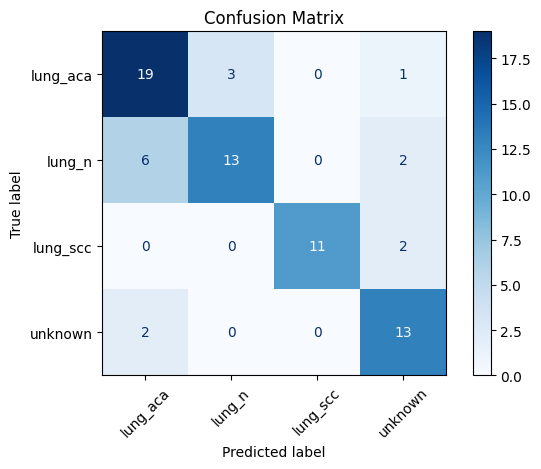

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from google.colab import drive
import os

# 1. Mount Google Drive và load dữ liệu
drive.mount('/content/gdrive', force_remount=True)
data_dir = "/content/gdrive/My Drive/saved_data"

X_train = np.load(os.path.join(data_dir, "train_images.npy"))
y_train = np.load(os.path.join(data_dir, "train_labels.npy"))
X_test  = np.load(os.path.join(data_dir, "valid_images.npy"))
y_test  = np.load(os.path.join(data_dir, "valid_labels.npy"))

# 2. Kiểm tra shape và chuyển định dạng nếu cần (channels_first -> channels_last)
print("Before transpose:", X_train.shape)
if X_train.ndim == 4 and X_train.shape[1] == 3:
    X_train = X_train.transpose(0, 2, 3, 1)
    X_test  = X_test.transpose(0, 2, 3, 1)
print("After transpose: ", X_train.shape)
print("y_train unique labels:", np.unique(y_train))

# 3. Shuffle và chuẩn hóa dữ liệu
X_train, y_train = shuffle(X_train, y_train, random_state=1080)
X_test,  y_test  = shuffle(X_test,  y_test,  random_state=1080)

X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# 4. Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((3,3)),
    Conv2D(64, (5,5), activation='relu'),
    AveragePooling2D((3,3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

# 5. Huấn luyện model
history = model.fit(
    X_train, y_train,
    epochs=60,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# 6. Vẽ biểu đồ Training và Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation accuracy', color='blue')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Đánh giá trên tập test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

# 8. Dự đoán và vẽ Confusion Matrix
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

classes = np.unique(y_test)
label_names = ['lung_aca','lung_n','lung_scc','unknown']  # Tùy chỉnh theo nhãn thực tế

cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
